# `diffusive_size_factor_DNS`

PoreSpy's `diffusive_size_factor_DNS` includes the steps for predicting the diffusive size factors of the conduit images decribed [here](https://doi.org/10.1016/j.cageo.2022.105086). Note that the diffusive conductance of the conduits can be then calculated by multiplying the size factor by diffusivity of the phase. The function takes in the images of segmented porous medium and returns an array of diffusive size factors for all conduits in the image. Therefore, the framework can be applied to both one conduit image as well as a segmented image of porous medium.

In [1]:
import inspect
import warnings

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import porespy as ps

ps.visualization.set_mpl_style()
warnings.filterwarnings("ignore")
inspect.signature(ps.networks.diffusive_size_factor_DNS)

<Signature (regions, throat_conns, voxel_size=1)>

## `regions`

We can create a 3D image using PoreSpy's `poly_disperese_spheres` generator and segment the image using `snow_partitioning` method or `snow2` network extraction method.

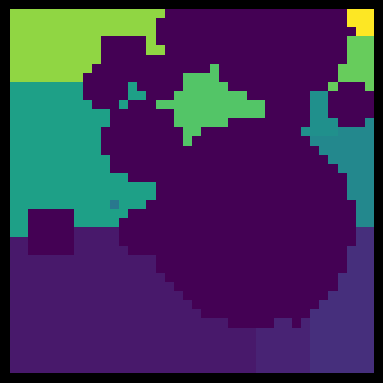

In [2]:
np.random.seed(10)
shape = [40, 40, 40]
dist = sp.stats.norm(loc=7, scale=5)
im = ps.generators.polydisperse_spheres(shape=shape, porosity=0.7, dist=dist, r_min=3)

results = ps.filters.snow_partitioning(im=im.astype(bool))
regions = results["regions"]
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(regions[:, :, 5], origin="lower", interpolation="none")
ax.axis(False);

## `throat_conns`

PoreSpy's `diffusive_size_factor_DNS` method takes in the segmented image and the conncetions of regions in the segmented image (throat conns). In this example we have created an image with voxel_size=1. For a different voxel size, the voxel_size argument needs to be passed to the method.

Note that `find_conns` method returns the connections in the segmented region. The order of values in conns is similar to the network extraction conns. Therefore, the region with label=1 in the segmented image is mapped to indice 0 in conns.

In [3]:
conns = ps.networks.find_conns(regions)
size_factors = ps.networks.diffusive_size_factor_DNS(regions, throat_conns=conns)

diffusive_size_factor_DNS:   0%|          | 0/94 [00:00<?, ?it/s]

## `voxel_size`

By default, the `diffusive_size_factor_DNS` uses voxel_size=1. For an image with a different resolution, the voxel size needs to be passed as an argument. Let's assume that voxel size for the generated image is 1e-6 [m]:

In [4]:
voxel_size = 1e-6
size_factors = ps.networks.diffusive_size_factor_DNS(
    regions, throat_conns=conns, voxel_size=1e-6
)

diffusive_size_factor_DNS:   0%|          | 0/94 [00:00<?, ?it/s]